In [3]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|█████████████████| 7.72M/7.72M [00:00<00:00, 23.0MB/s]


In [4]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [5]:
import pandas as pd
import numpy as np

In [6]:
html = browser.html
html_soup = soup(html, 'html.parser')
print(html_soup)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [7]:
html_table = html_soup.find('table', class_='table')
print(html_table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [8]:
df = pd.read_html(str(html_table))[0]
print(df)
df.head(5)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
pd.isna(df)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1862,False,False,False,False,False,False,False
1863,False,False,False,False,False,False,False
1864,False,False,False,False,False,False,False
1865,False,False,False,False,False,False,False


In [12]:
df.dropna()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
df['month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [14]:
df['month'].value_counts()

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [ ]:
# How many months exist on Mars?

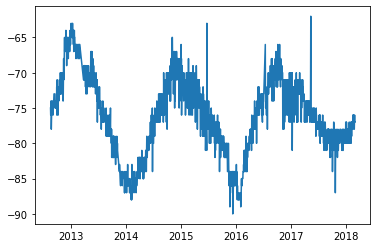

In [18]:
import matplotlib.pyplot as plt
plt.plot(df['terrestrial_date'], df['min_temp'])
plt.show()

# If you look at the plot below, and see when the temperature is more or less the same from peak to peak, 
#  it goes over 2 years, hence mars has around 24 months.

In [ ]:
# How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.


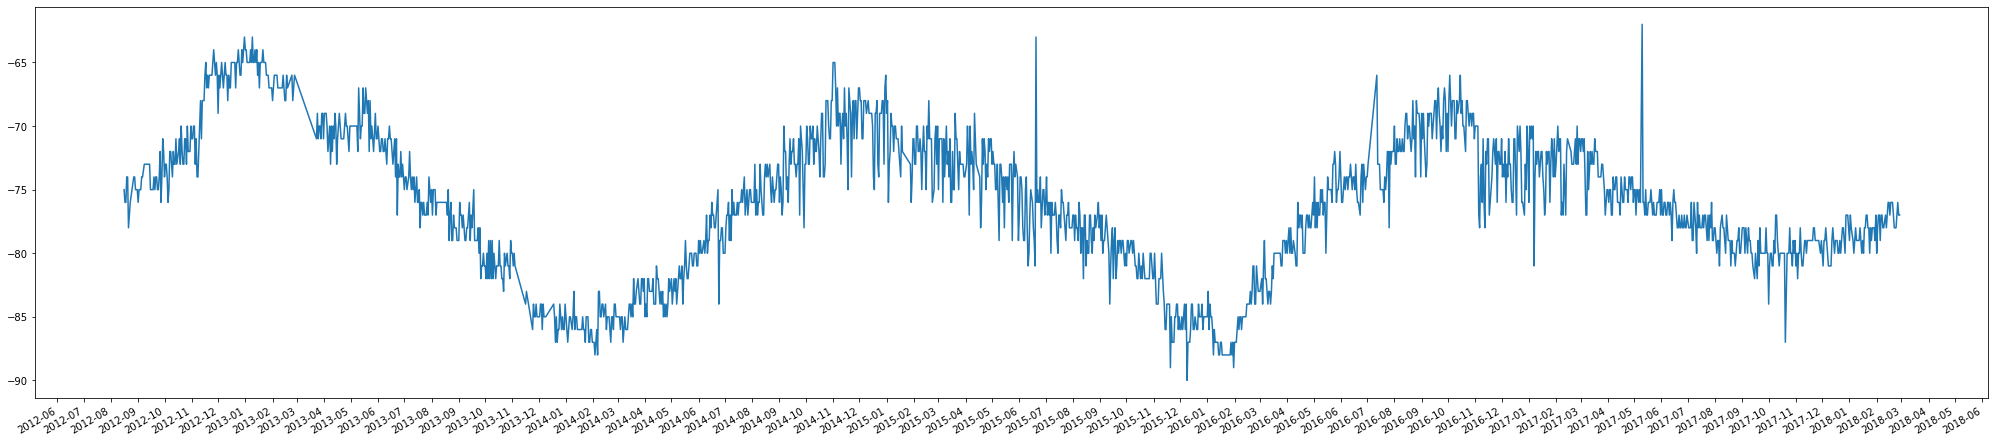

In [38]:
import matplotlib.dates as mdate

plt.subplots(figsize=(35, 8))
plt.plot(df['terrestrial_date'], df['min_temp'])
# plt.xticks(df['terrestrial_date'])
locator = mdate.MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
# graph.margins(x=2013, y=-65)
# plt.show()
plt.savefig("Martian_temperatures.jpeg")
# df['terrestrial_date','min_temp'].plot()

# Going by the plot below, the same season or temperature occurs almost 24 months after the first 
# example: If you look at temperature peak 2013-01, the next temperature peak occurs around 2014-11, which is 23 months
# in a year in Mars. So around 23 X 30 (days) = 690 terrestrial days in a Martian year

<AxesSubplot:>

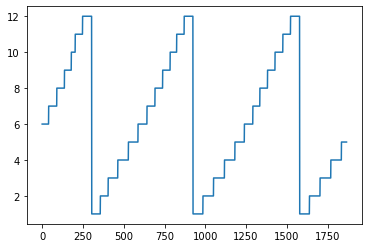

In [16]:
df['month'].plot()

In [22]:
# df_data = df[(df['terrestrial_date']>'2013-01-01' & (df['terrestrial_date'] < '2015-01-01'))]
# df_data
df['min_temp'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      -75.0
1      -76.0
2      -76.0
3      -74.0
4      -74.0
        ... 
1862   -78.0
1863   -77.0
1864   -76.0
1865   -77.0
1866   -77.0
Name: min_temp, Length: 1867, dtype: float64>

In [ ]:
# Which month, on average, has the lowest temperature? The highest?

In [33]:
df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [43]:
df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [46]:
# avg_min_month_df = df.groupby('month').mean()
avg_min_month_df = df.groupby('month')['min_temp'].mean()
# subset_df = avg_min_month_df['min_temp']
print(avg_min_month_df)
# avg_min_month_df.plot()


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


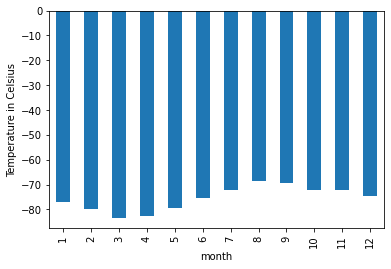

In [47]:
# Plot the average temperature by month
avg_min_month_df.plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.show()
# Lowest temp is MONTH 3
# Highest Temperature is MONTH 8

In [48]:
# avg_min_month_df = df.groupby('month').mean()
avg_pressure_df = df.groupby('month')['pressure'].mean()
# subset_df = avg_min_month_df['min_temp']
print(avg_pressure_df)
# avg_min_month_df.plot()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


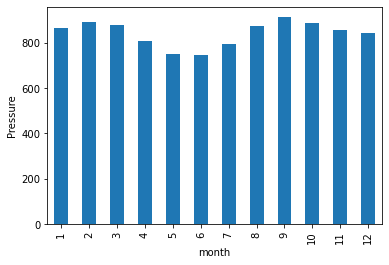

In [50]:
# Plot the average temperature by month
avg_pressure_df.plot(kind='bar')
plt.ylabel('Pressure')
plt.show()
# Lowest pressure is MONTH 6
# Highest pressure is MONTH 9

In [51]:
df.to_csv("Mars_temperature_data.csv")